<a href="https://colab.research.google.com/github/alves-bruno-ds/data-science-BR/blob/main/Analisando_os_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<img alt="C_DADOS.BR POSTS.png" width="50%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/C_DADOS.BR%20POSTS.png">

# Análise dos Dados do Airbnb - *Buenos Aires*

Viajar é uma das melhores experiências que eu conheço. Desde os preparativos até estar efetivamente no destino, tudo é mágico. Se você já escolheu o lugar para passar suas próximas férias e busca alternativas aos hotéis que tal dar uma chance ao [Airbnb](https://www.airbnb.com.br/)? 

A plataforma é um sucesso em todo o mundo. **No ano de 2021, com 14 anos de vida, comemorou 1 bilhão de chegadas e mais de US$ 110 bilhões em ganhos para anfitriões.**

Em resumo, Airbnb é uma plataforma para alugar acomodação por temporada e promover experiências únicas.

O nome ‘Airbnb’ vem da junção das palavras em inglês *air* (ar) com a sigla *bnb* (bed and breakfast) – categoria que reúne os estabelecimentos, geralmente residenciais, que oferecem pernoite com café da manhã. Aliás, o primeiro nome da plataforma foi justamente: **Airbed & Breakfast.**


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires na Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**


## Parte 01 - Obtenção dos Dados
A primeira coisa a se fazer é importar as bibliotecas que iremos utilizar no estudo, e logo em seguida o conjunto de dados (arquivo.csv) para o nosso Dataframe.


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/buenos_aires.csv")


Para este estudo, importamos as seguintes bibliotecas: Pandas, Seaborn, 
e Matplotlib. Sendo que, para esta útima, determinamos a função 'inline' para que seja plotado o gráfico direto em nosso notebook e não em outra janela separada.


---







## Parte 02 - Análise dos Dados
Para iniciar a análise dos dados, é importante que a gente conheça o Dataset e nos familiarize com as variáveis, catalogando e identificando cada uma delas em um dicionário. Para entender o que cada uma significa, consultamos o portal do [Inside Airbnb](http://insideairbnb.com/get-the-data.html). 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20085 entries, 0 to 20084
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20085 non-null  int64  
 1   name                            20082 non-null  object 
 2   host_id                         20085 non-null  int64  
 3   host_name                       20085 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20085 non-null  object 
 6   latitude                        20085 non-null  float64
 7   longitude                       20085 non-null  float64
 8   room_type                       20085 non-null  object 
 9   price                           20085 non-null  int64  
 10  minimum_nights                  20085 non-null  int64  
 11  number_of_reviews               20085 non-null  int64  
 12  last_review                     

**Dicionário das variáveis**

* id - número de identificação do imóvel
* name - nome da propriedade com uma breve descrição 
* host_id - código de identificação do anfitrião
* host_name - nome do anfitrião
* neighbourhood_group - coluna sem dados válidos           
* neighbourhood - nome do bairro onde se encontra o imóvel                   
* latitude - coordenada latitude (localização geográfica)                      
* longitude - coordenada longitude (localização geográfica)                      
* room_type - tipo de acomodação                        
* price - valor da diária                           
* minimum_nights - quantidade mínima de noites que o imóvel pode ser locado                  
* number_of_reviews - quantidade de opiniões/recomendação que a propriedade recebeu               
* last_review - data da última opinião/recomendação que o imóvel recebeu                    
* reviews_per_month - quantidade de opiniões/recomendações por mês                
* calculated_host_listings_count - quantidade de imóveis que o anfitrião em questão tem cadastrado no Airbnb    
* availability_365 - quantidade de dias que o imóvel está disponível nos próximos 365 dias                  
* number_of_reviews_ltm - quantidade de opiniões/recomendações nos últimos 12 meses             
* license - coluna com poucas informações relevantes (97% de valores ausentes). Vamos considerar como "sem valores válidos"                        


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

id                                          name   host_id host_name  \
0   11508            Amazing Luxurious Apt-Palermo Soho     42762   Candela   
1   14222  RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES  87710233     María   
2  317484                   Single Room in Palermo Soho   1621752      Luba   
3   15074                         ROOM WITH RIVER SIGHT     59338    Monica   
4  118070         Amazing view - GREAT Studio - Balcony    530261   Luciano   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Palermo -34.58184  -58.42415  Entire home/apt   
1                  NaN       Palermo -34.58617  -58.41036  Entire home/apt   
2                  NaN       Palermo -34.58992  -58.42236     Private room   
3                  NaN         Nuñez -34.53892  -58.46599     Private room   
4                  NaN       Palermo -34.58311  -58.42767  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0  21143               3                 33  2022-12-19               0.26   
1   5728               7                102  2022-12-05               0.80   
2   3348               2                160  2022-12-10               1.22   
3   5286              29                  0         NaN                NaN   
4  10572              14                 49  2022-07-22               0.36   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               309                      6   
1                               4               305                     11   
2                               4               349                      5   
3                               1               365                      0   
4                              27               349                      4   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [ ]:
# mostrar as 5 últimas entradas (verificar se a coluna 'license' realmente não tem valor válido)
df.tail()

id                                             name  \
20080  789876010794026163                   Mono ambiente vista panorámica   
20081  791445322793116711                    Departamento recoleta amplio.   
20082  789883094728711215                              Palermo Ápt bohemia   
20083  789886886364996844  Departamento en Congreso de Buenos Aires + coch   
20084  789889818985355570                           Dulce hogar Belgrano R   

         host_id host_name  neighbourhood_group neighbourhood   latitude  \
20080  161559109      Juan                  NaN     Caballito -34.608729   
20081  154496179    Ramiro                  NaN      Recoleta -34.590495   
20082   60115955     Hache                  NaN       Palermo -34.584193   
20083  119161621    Camila                  NaN     Monserrat -34.610114   
20084   48005753  Federico                  NaN      Belgrano -34.561013   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
20080 -58.460363  Entire home/apt   6080               1                  0   
20081 -58.400738  Entire home/apt   7048               3                  0   
20082 -58.440578  Entire home/apt   2114               4                  0   
20083 -58.390820  Entire home/apt  10500               2                  0   
20084 -58.463017  Entire home/apt   9867               2                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
20080         NaN                NaN                              18   
20081         NaN                NaN                               1   
20082         NaN                NaN                              15   
20083         NaN                NaN                               1   
20084         NaN                NaN                               2   

       availability_365  number_of_reviews_ltm license  
20080               331                      0     NaN  
20081               364                      0     NaN  
20082               342                      0     NaN  
20083               339                      0     NaN  
20084                90                      0     NaN

### **Questão 01 -  Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))


Entradas:	20085
Variáveis:	18



In [ ]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Observamos que o Dataset possui 18 colunas (entradas) e 20.085 variáveis (linhas).
Em relação ao tipo das variáveis temos os 03 formatos: Números inteiros, Texto e Números fracionários

### **Questão 02 -  Qual a porcentagem de valores ausentes no *dataset*?**
É importante sabermos a quantidade de valores ausentes e onde eles se encontram para verificarmos qual decisão tomar em relação a eles. Se a quantidade de valores ausentes for insignificante em relação a quantidade de dados e o próposito do estudo, podemos excluí-los. Caso contrário, é necessário tratá-los e substituir as células ausentes com valores relevantes , como por exemplo a média dos valores ou o valor mais recorrente.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]). sort_values (ascending=False)


neighbourhood_group               1.000000
license                           0.979437
reviews_per_month                 0.190739
last_review                       0.190739
name                              0.000149
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

As entradas *neighbourhood_group* e *license* são toda e/ou em sua maioria constituídas por valores ausentes, ou seja, elas não serão relevantes para o nosso estudo. Podemos excluir essa entradas, para que possamos minimizar o desvio.

Já as entradas *reviews_per_month*, *last_review* e *name*, possuem uma quantidade muito pequena de valores ausentes, além de serem muito relevantes para o entendimento do modelo.

As demais entradas não posssuem nenhum valor ausente.

### **Questão 03 -  Qual o tipo de distribuição das variáveis?** 

Para ter um *overview* de como as varáveis estão distribuídas (ver o *range*  e os *outliers*), plotamos o histograma de cada entrada individualmente.

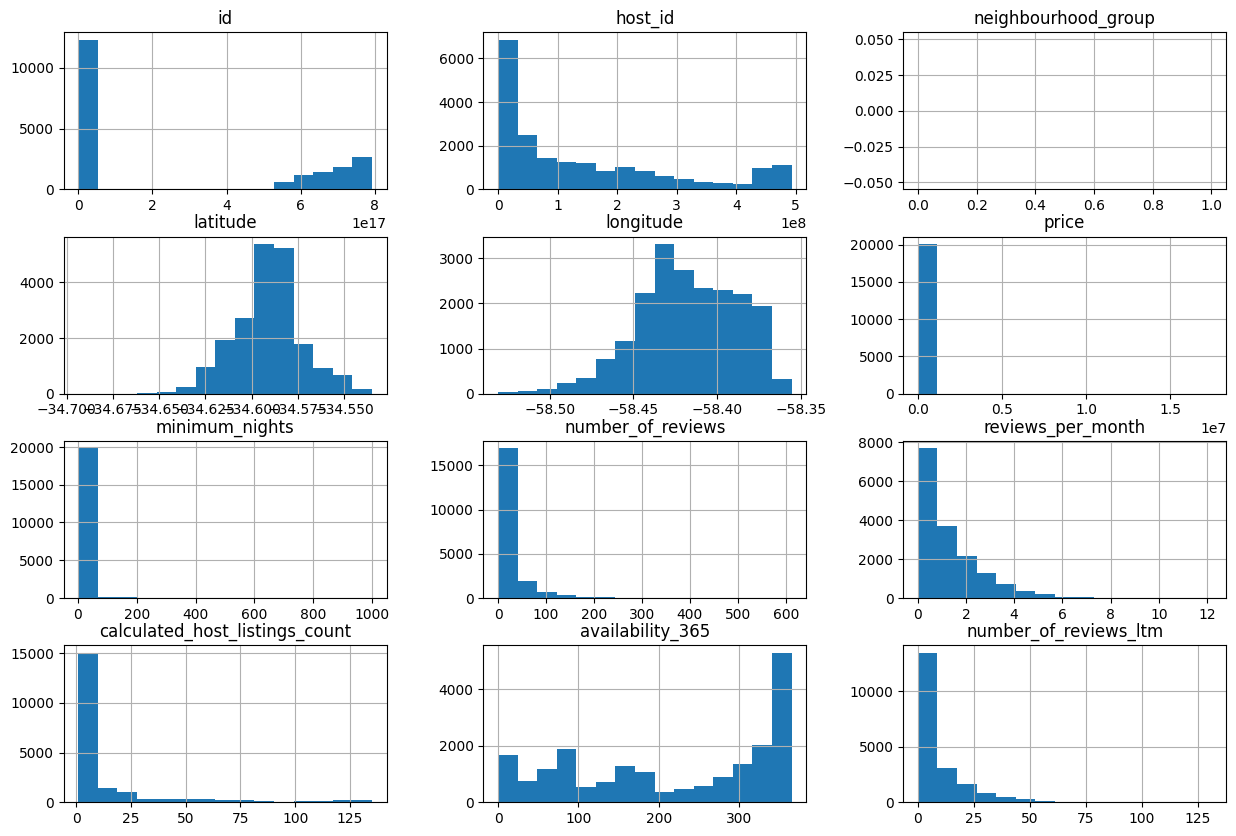

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Questão 04 - Qual o tipo de distribuição das variáveis?**

Olhando a disposição dos gráficos, podemos suspeitar da presença de outliers (valores discrepantes ou fora de contexto). Por exemplo, analisando o gráfico da entrada *price*, ele mostra um aglomerado de dados em uma região do gráfico, e o restante , sem informação alguma. Muito provavelmente tem uma ou algumas entradas que destoam das demais, por exemplo: 95% dos dados podem estar entre 100 e 1.000,00 pesos. Já 5% acima de 100.000 pesos. Parece algo irreal, mas não podemos duvidar da possibilidade agora.

Vamos testar dois métodos para confirmar a hipótese da presença de *oultliers*

* Resumo estatístico por meio do método **describe ()**
* Plotar *boxplots* para a variável

Vamos analisar as seguintes entradas:
*price , minimum_nights , number_of_reviews , reviews_per_month ,
calculated_host_listings_count*



In [ ]:
# Resumo estatístico das variáveis pelo método describe ()
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  2.008500e+04    20085.000000       20085.000000       16254.000000   
mean   1.644369e+04        7.208564          21.916604           1.313682   
std    1.915379e+05       28.313061          38.478268           1.324499   
min    2.600000e+02        1.000000           0.000000           0.010000   
25%    5.638000e+03        2.000000           1.000000           0.330000   
50%    7.953000e+03        3.000000           8.000000           0.910000   
75%    1.233400e+04        5.000000          25.000000           1.920000   
max    1.744311e+07     1000.000000         612.000000          12.170000   

       calculated_host_listings_count  
count                    20085.000000  
mean                        13.073189  
std                         26.460109  
min                          1.000000  
25%                          1.000000  
50%                          2.000000  
75%                          9.000000  
max                        135.000000

Algumas considerações:

* A variável *price* tem um valor máximo muito superior a média;
* A quantidade mínima de noites (*minimum_nights*) está acima de 365 dias no ano;
* Tem algum imóvel com mais de 100x mais recomendação que a média (*number_of_reviews*); A discrepância também se dá na variável (*review_per_month*);
* 75% dos anfitriões tem em média 10 imóveis disponivéis, porém o valor máximo é 135 imóveis (neste caso, consultando as informações do site, não é um outlier, pois há várias pessoas que possuem entre 20 e 100 imóveis);



#### Boxplot para a variável **price**

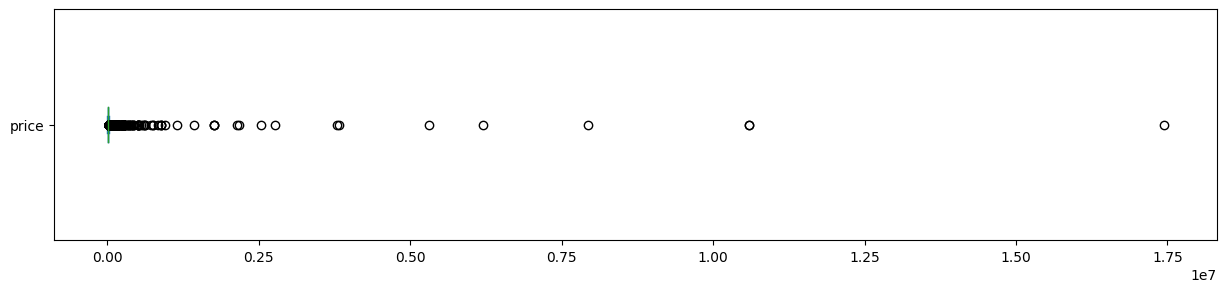

price: valores acima de 20000:
1933 entradas
9.6241%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# mostrar quantidade de variáveis que ultrapassa 20 mil pesos (um pouco mais que a média)
print("price: valores acima de 20000:")
print("{} entradas".format(len(df[df.price > 20000	])))
print("{:.4f}%".format((len(df[df.price >20000]) / df.shape[0])*100))

#### Boxplot para a variável **minimum_nights**



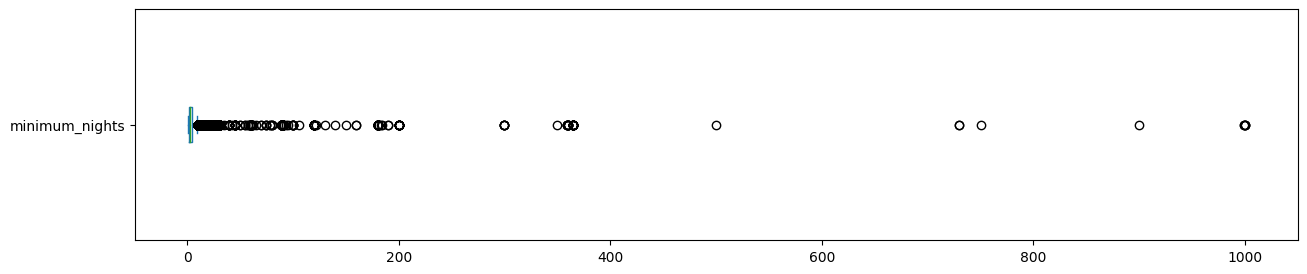

minimum_nights: valores acima de 365:
10 entradas
0.0498%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# mostrar quantidade de variáveis que ultrapassa 365 dias (1ano)
print("minimum_nights: valores acima de 365:")
print("{} entradas".format(len(df[df.minimum_nights > 365])))
print("{:.4f}%".format((len(df[df.minimum_nights > 365]) / df.shape[0])*100))

#### Boxplot para a variável **number_of_reviews**

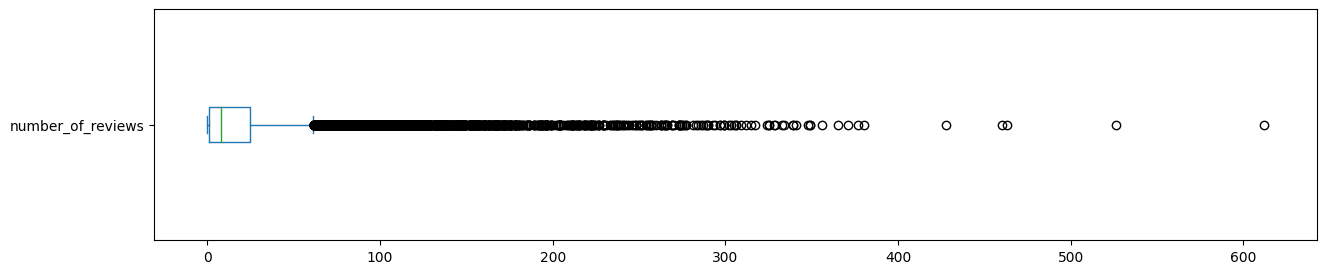

minimum_nights: valores acima de 30:
371 entradas
1.8471%


In [ ]:
# number_of_reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# mostrar quantidade de variáveis que ultrapassa 30 reviews
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para a variável **reviews_per_month**


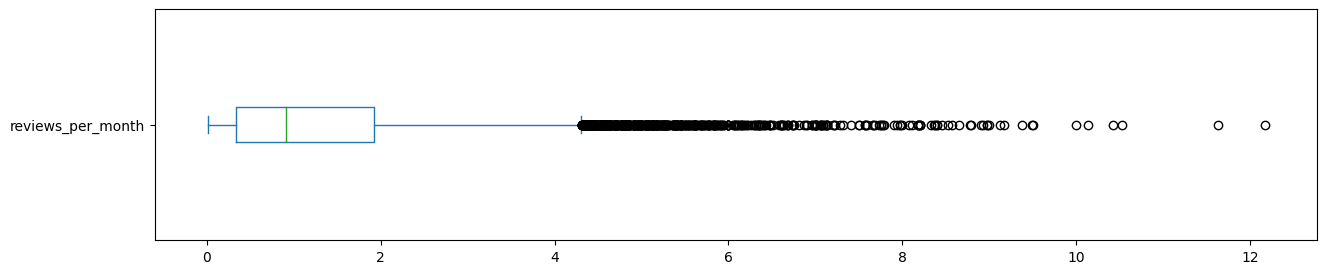

minimum_nights: valores acima de 12:
1926 entradas
9.5892%


In [ ]:
# reviews_per_month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# mostrar quantidade de variáveis que ultrapassa 12 reviews
print("minimum_nights: valores acima de 12:")
print("{} entradas".format(len(df[df.minimum_nights > 12])))
print("{:.4f}%".format((len(df[df.minimum_nights > 12]) / df.shape[0])*100))

### **Questão 05 - Eliminando os Outliers para uniformizar as variáveis**

Vamos eliminar do Dataset os valores discrepantes das entradas acima e também desconsiderar as duas entradas sem valores válidos.

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 20000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 365].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 12].index, axis=0, inplace=True)


# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# remover `license`, pois está  (quase) vazio
df_clean.drop('license', axis=1, inplace=True)

#### Plotagem do histograma após a limpeza dos dados

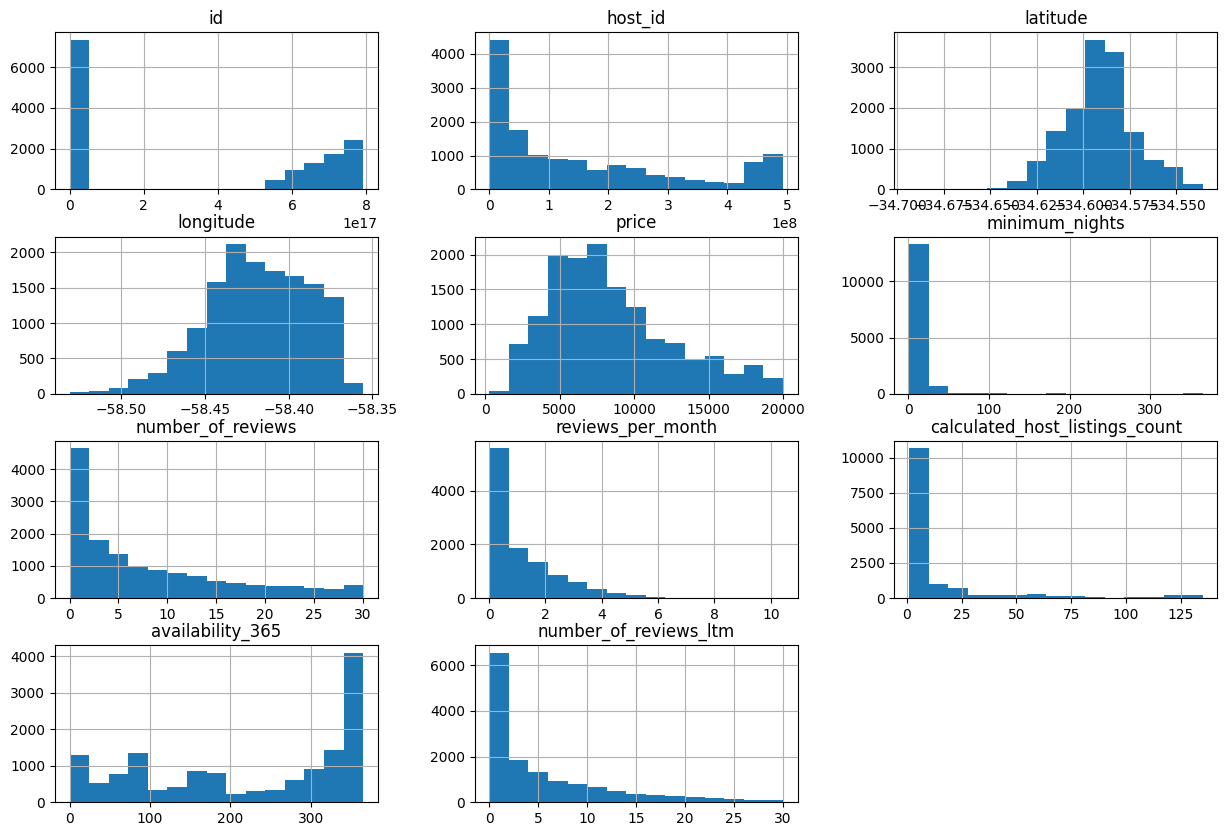

In [ ]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Questão 06 - Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()


8411.254666666666

Ao eliminarmos os valores que estavam um pouco fora da média da coluna *price*, percebemos que a média de valores diminuiu, ou seja, ficou mais coerente em relação a quantidade de entradas. Os valores considerados como *outliers* "puxam" a média para cima, distorcendo os resultados.

### **Questão 07 - Qual a correlação existente entre as variáveis**

Para medir a correlação entre duas variáveis, que nada mais é o quanto uma variável influencia no aumento ou diminuição do valor de um outra, ou ainda, o quão semelhantes elas podem se apresentar, utilizaremo-nos de dois métodos:

* Matriz de correlação
* Geração de *headmap* a partir dessa matriz, usando a biblioteca **seaborn**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count']].corr()



# mostrar a matriz de correlação
display(corr)

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.054097          -0.032520   
minimum_nights                 -0.054097        1.000000          -0.089424   
number_of_reviews              -0.032520       -0.089424           1.000000   
reviews_per_month               0.009967       -0.146847           0.232271   
calculated_host_listings_count  0.164249       -0.023358          -0.039132   

                                reviews_per_month  \
price                                    0.009967   
minimum_nights                          -0.146847   
number_of_reviews                        0.232271   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.055338   

                                calculated_host_listings_count  
price                                                 0.164249  
minimum_nights                                       -0.023358  
number_of_reviews                                    -0.039132  
reviews_per_month                                     0.055338  
calculated_host_listings_count                        1.000000

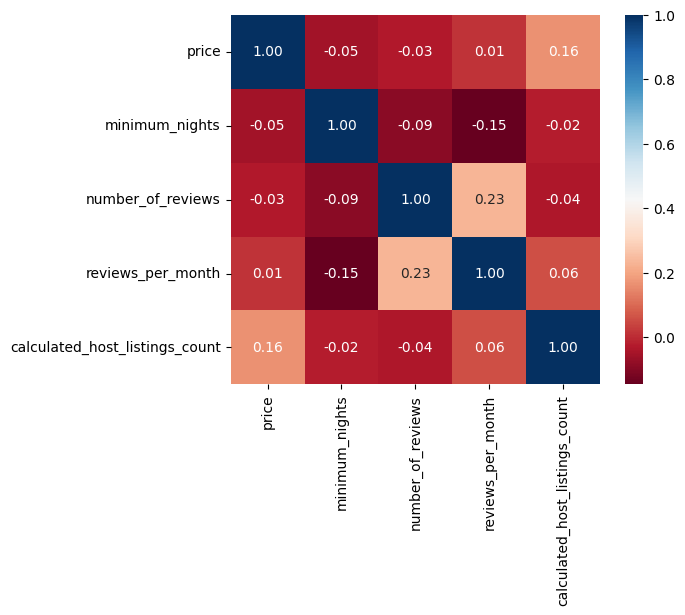

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Como exemplo de correlação entre as variáveis podemos citar que:

* O preço da diária não tem nenhuma relação com a quantidade mínima de noites reservada;
* O quantidade de reviews por mês impacta a quantidade total de reviews da propriedade (óbvio);

---
*Porém, no geral, podemos observar que tais correlações não são tão significativas, percebendo o grau de cada uma, no gráfico.*



### **Questão 08 - Qual o tipo de imóvel mais alugado no Airbnb?**
Para esta análise utilzamos o Dataframe original, antes da limpeza. (Para ter certeza de que consideramos todas as variáveis, inclusive as discrepantes).

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    17823
Private room        1996
Shared room          160
Hotel room           106
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]*100

Entire home/apt    88.737864
Private room        9.937765
Shared room         0.796614
Hotel room          0.527757
Name: room_type, dtype: float64

Em resumo:

* 89% das acomodações são apartamemtos inteiros;
* 10% são quartos privativos;
* 1% estão divididos em quartos de hotel e quartos compartilhados;


### **Questão 09 - Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    14129.884211
Palermo           9639.038864
Nuñez             8998.329114
Recoleta          8834.210746
Belgrano          8696.683480
Retiro            8590.693475
Colegiales        8149.077778
Villa Devoto      8122.568182
Barracas          8074.965217
San Nicolas       7831.818074
Name: price, dtype: float64

Para confirmar esta constatação dos dados, fizemos uma rápida pesquisa sobre os bairros de Buenos Aires no Google, seguem os *insigths*:

**Puerto Madero** - "...o bairro mais caro da região"

**Palermo** - "O maior bairro da cidade, une casas e prédios residenciais, parques maravilhosos, centros culturais, grande área comercial e os mais incríveis bares, restaurantes e casas de shows em Buenos Aires."

**Nuñes** - "Possui edifícios enormes, casarões antigos de grande valor arquitetônico, e uma grande atividade comercial"

**Recoleta** - "O luxo de Buenos Aires é Recoleta"

**Belgrano** - "O Belgrano abrange vários enclaves residenciais sofisticados, uma movimentada rua comercial conhecida pelas marcas de grifes argentinas"

---
Como podemos observar, os dados são confiáveis e muito prováveis de exprimirem a realidade, já que apresentam valores mais elevados em regiões nobres e estruturadas da cidade.



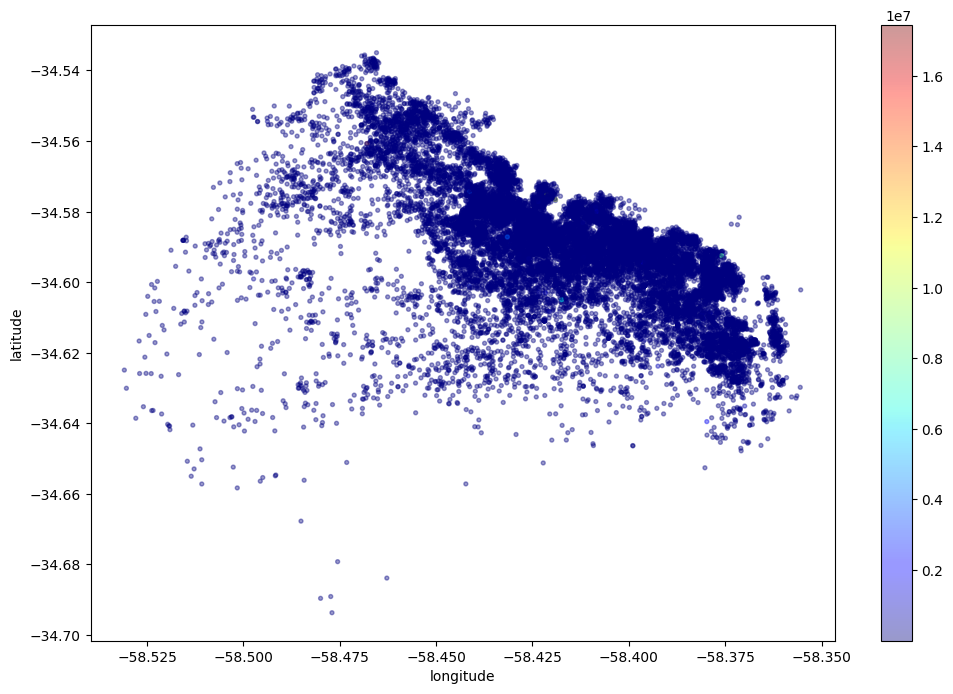

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

No gráfico, podemos verificar que a grande maioria dos imóveis fica na região costeira, onde estão situados os principais centros.

<img alt="C_DADOS.BR POSTS.png" width="80%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/mapa_turistico_buenos_aires.jpg">



### **Questão 10 - Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

7.506385964912281

Em Buenos Aires, a média, as locações mínimas são de 1 semana, para imóveis no Airbnb. 

## Conclusões


Após a análise dos dados disponibilizados, podemos concluir alguns pontos importantes, que podem ser considerados em uma futura procura por hospedagem em Buenos Aires:

* As regiões mais caras para se hospedar são as que ficam mais próximas da costa e do centro, em contrapartida, também são regiões com mais opções de propriedades;
* Mais da metade das hospedagens são em apartamentos inteiros;
* A média de noites é de 07 dias;
* É comum encontrarmos anfitriões que possuem mais de 01 imóvel cadastrados na plataforma. Com isso, é possível conversar e pedir sugestões da propriedade que for mais conveniente para o período de estadia;
* O valor médio de hospedagem é de 8 mil pesos argentinos que, convertendo para a nossa moeda, representa R$ 197,50.